In [1]:
from numpy import  cos, pi
import numpy as np
import matplotlib.pyplot as plt
from floquet_simulations.hamiltonians import CreateHFGeneral
from floquet_simulations.periodic_functions import Cosine
from scipy.special import  jv, jn_zeros
from scipy.linalg import eigh
from itertools import product
import pandas as pd
import os
from pathlib import Path
from floquet_simulations.plot_functions import PlotParams, PlotAbsRealImagHamiltonian, PlotRealHamiltonian
from floquet_simulations.generate_gradients import ComputeAValsFromRequiredGradients, GetAValsFromBesselXVals
PlotParams(fontsize=12)
colour1 = "#FFB69C"
colour2= "#9BA2FF"

## option 1 - 90 degree rotational symmetry


In [18]:
l_red = (0,0.5);r_red = np.sqrt(l_red[0]**2 + l_red[1]**2)
l_yel = (1,0.5);r_yel = np.sqrt(l_yel[0]**2 + l_yel[1]**2)
l_gre = (0,1.5);r_gre = np.sqrt(l_gre[0]**2 + l_gre[1]**2)
l_blu = (1,1.5);r_blu = np.sqrt(l_blu[0]**2 + l_blu[1]**2)

scale = 0.4
radii = np.array([r_red, r_yel, r_gre, r_blu])*scale
gradients = radii - radii[0]+ jv(0, 3.8316)
xvals = ComputeAValsFromRequiredGradients(gradients)

In [20]:
omega = 1
A1_red = xvals[0]*omega/2
A2_yelred = xvals[1]*omega - A1_red
A2_gre = xvals[2]*omega/2
A3_bluyelred = xvals[3]*omega - A2_yelred
A3_blugre = xvals[3]*omega - A2_gre
A1_yelgre = xvals[1]*omega - A2_gre

Avals1 = [A1_red, A2_yelred, A3_bluyelred]
Avals2 = [A1_red, A2_gre, A3_blugre]
Avals3 = [A1_yelgre, A2_gre, A3_blugre]

couples = [(0,0), (0,1), (1,1), (1,2)]
tunnellings = [[jv(0,(Avals[i] + Avals[j])/omega) for i,j in couples] for Avals in [Avals1, Avals2, Avals3]]
print(tunnellings)

[[-0.40275939321752835, -0.1555450307354284, 0.4392114597028585, 0.11835072696749332], [-0.40275939321752835, -0.29826007567906826, -0.002760217206570637, 0.11835072696749332], [-0.27646749740707743, -0.1555450307354284, -0.002760217206570637, 0.11835072696749332]]


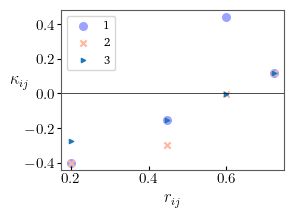

In [33]:

colour3 = "#"
fig, ax = plt.subplots(figsize=(7.3/2.54,5.3/2.54))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
ax.scatter(radii,tunnellings[0], marker = 'o', c=colour2, s = 30, label="1")
ax.scatter(radii,tunnellings[1], marker = 'x', c=colour1, s = 20, label="2")
ax.scatter(radii,tunnellings[2], marker = '>',  s = 9, label="3")

# ax.plot(r_axes, tunnellings_axes,c= colour_axes, label=r"$y=0$")

# ax.scatter(r_diagonal[:n_avals_plot-1], tunnellings_diagonal[:n_avals_plot-1], marker = 'x', c=colour_diagonal, s = 13)
# ax.scatter(r_axes, tunnellings_axes, marker = 'x', c=colour_axes, s = 13)

ax.tick_params(axis='both', which='major', pad=1)
ax.set_xlabel(r"$r_{ij}$")

ax.set_ylabel(r"$\kappa_{ij}$", rotation=0)
ax.legend(loc="upper left")
# xticks = np.arange(0,12,2)
# ax.set_xticks(xticks)
# ax.set_xticklabels([str(i+1) for i in xticks])\
# fig.savefig(save_dir/"linear_tunnelling_2D.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()


## 5x5

In [50]:
# l_red = (0,0.5);r_red = np.sqrt(l_red[0]**2 + l_red[1]**2)
# l_ora = (1,0.5);r_ora = np.sqrt(l_ora[0]**2 + l_ora[1]**2)
# l_yel = (0,1.5);r_yel = np.sqrt(l_yel[0]**2 + l_yel[1]**2)
# l_gre = (1,1.5);r_gre = np.sqrt(l_gre[0]**2 + l_gre[1]**2)
# l_aqu = (2,0.5);r_aqu = np.sqrt(l_aqu[0]**2 + l_aqu[1]**2)
# l_blu = (2,1.5);r_blu = np.sqrt(l_blu[0]**2 + l_blu[1]**2)

In [51]:
link_indices = [(0,0.5), (1,0.5),(0,1.5), (1,1.5), (2,0.5), (2,1.5)]
r_vals = np.array([np.sqrt(x**2 + y**2) for (x,y) in link_indices])

In [61]:
scale = 0.5
radii = r_vals*scale
gradients = radii - radii[0]+ jv(0, 3.8316) +0.2
xvals = ComputeAValsFromRequiredGradients(gradients)
print(gradients)

[-0.20275939  0.1062576   0.29724061  0.44862843  0.57801701  0.79724061]


In [62]:
A1 = xvals[0]/2
A2 = -xvals[0]/2
A4 = xvals[1]+A2
A5 = -(xvals[3] - A4)
A6 = xvals[5] + A5
A3_ora = xvals[2] + A2
A3_aqa = xvals[4] + A5
Avals1 = [A1, A2, A3_ora, A4, A5, A6]
Avals2 = [A1, A2, A3_aqa, A4, A5, A6]

In [63]:
couples = [(0,1), (3,1), (2,1), (3,4), (2,4), (5,4)]
tunnellings = [[jv(0,(Avals[i] - Avals[j])) for i,j in couples] for Avals in [Avals1, Avals2]]

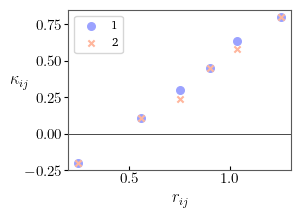

In [64]:
fig, ax = plt.subplots(figsize=(7.3/2.54,5.3/2.54))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
ax.scatter(radii,tunnellings[0], marker = 'o', c=colour2, s = 30, label="1")
ax.scatter(radii,tunnellings[1], marker = 'x', c=colour1, s = 20, label="2")

ax.tick_params(axis='both', which='major', pad=1)
ax.set_xlabel(r"$r_{ij}$")

ax.set_ylabel(r"$\kappa_{ij}$", rotation=0)
ax.legend(loc="upper left")
# xticks = np.arange(0,12,2)
# ax.set_xticks(xticks)
# ax.set_xticklabels([str(i+1) for i in xticks])\
# fig.savefig(save_dir/"linear_tunnelling_2D.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()


# 8x8 using Manhattan distance for radius

In [5]:
#indices; real radius; manhattan radius
l_J1 = (0,0.5);r_J1 = np.sqrt(l_J1[0]**2 + l_J1[1]**2); rm_J1 = l_J1[0]+ l_J1[1]
l_J2 = (1,0.5);r_J2 = np.sqrt(l_J2[0]**2 + l_J2[1]**2); rm_J2 = l_J2[0]+ l_J2[1]
l_J3 = (0,1.5);r_J3 = np.sqrt(l_J3[0]**2 + l_J3[1]**2); rm_J3 = l_J3[0]+ l_J3[1]
l_J4 = (1,1.5);r_J4 = np.sqrt(l_J4[0]**2 + l_J4[1]**2); rm_J4 = l_J4[0]+ l_J4[1]
l_J5 = (2,0.5);r_J5 = np.sqrt(l_J5[0]**2 + l_J5[1]**2); rm_J5 = l_J5[0]+ l_J5[1]
l_J6 = (0,2.5);r_J6 = np.sqrt(l_J6[0]**2 + l_J6[1]**2); rm_J6 = l_J6[0]+ l_J6[1]
l_J7 = (3,0.5);r_J7 = np.sqrt(l_J7[0]**2 + l_J7[1]**2); rm_J7 = l_J7[0]+ l_J7[1]
l_J8 = (1,2.5);r_J8 = np.sqrt(l_J8[0]**2 + l_J8[1]**2); rm_J8 = l_J8[0]+ l_J8[1]
l_J9 = (2,1.5);r_J9 = np.sqrt(l_J9[0]**2 + l_J9[1]**2); rm_J9 = l_J9[0]+ l_J9[1]
l_J10 = (0,3.5);r_J10 = np.sqrt(l_J10[0]**2 + l_J10[1]**2); rm_J10 = l_J10[0]+ l_J10[1]
l_J11 = (1,3.5);r_J11 = np.sqrt(l_J11[0]**2 + l_J11[1]**2); rm_J11 = l_J11[0]+ l_J11[1]
l_J12 = (3,1.5);r_J12 = np.sqrt(l_J12[0]**2 + l_J12[1]**2); rm_J12 = l_J12[0]+ l_J12[1]
l_J13 = (2,2.5);r_J13 = np.sqrt(l_J13[0]**2 + l_J13[1]**2); rm_J13 = l_J13[0]+ l_J13[1]
l_J14 = (2,3.5);r_J14 = np.sqrt(l_J14[0]**2 + l_J14[1]**2); rm_J14 = l_J14[0]+ l_J14[1]
l_J15 = (3,2.5);r_J15 = np.sqrt(l_J15[0]**2 + l_J15[1]**2); rm_J15 = l_J15[0]+ l_J15[1]
l_J16 = (3,3.5);r_J16 = np.sqrt(l_J16[0]**2 + l_J16[1]**2); rm_J16 = l_J16[0]+ l_J16[1]


radii = np.array([r_J1, r_J2, r_J3, r_J4, r_J5, r_J6, r_J7, r_J8, r_J9, r_J10,
                  r_J11, r_J12, r_J13, r_J14, r_J15, r_J16])
radii_manhat = np.array([rm_J1, rm_J2, rm_J3, rm_J4, rm_J5, rm_J6, rm_J7, rm_J8, rm_J9, rm_J10,
                  rm_J11, rm_J12, rm_J13, rm_J14, rm_J15, rm_J16])

# choose scale to get gradients positive and negative where you want them to be
scale = 0.115
gradients = radii_manhat*scale - radii_manhat[0]*scale+ jv(0, 3.8316)
for i,j in enumerate(gradients):
    print(f"{i+1}:{j}") 

1:-0.40275939344110157
2:-0.2877593934411016
3:-0.2877593934411016
4:-0.17275939344110153
5:-0.17275939344110153
6:-0.17275939344110153
7:-0.057759393441101536
8:-0.057759393441101536
9:-0.057759393441101536
10:-0.057759393441101536
11:0.05724060655889851
12:0.05724060655889851
13:0.05724060655889851
14:0.1722406065588985
15:0.1722406065588985
16:0.2872406065588985


In [6]:
xvals = ComputeAValsFromRequiredGradients(gradients)
print(xvals)
# get diagonal A values from diagonal x values
# diagonal x values are xvals[0], xvals[1], xvals[3], xvals[8], xvals[12], xvals[14], xvals[15]


# choose A4 first from boundary
A4 = xvals[9]/2
A5 = xvals[12] - A4
A6 = xvals[14] - A5
A7 = xvals[15] - A6
A3 = xvals[8] - A4
A2 = xvals[3] - A3
A1 = xvals[1] - A2

# choose A3 first from boundary
# A3 = xvals[5]/2
# A4 = xvals[8] - A3
# A5 = xvals[12] - A4
# A6 = xvals[14] - A5
# A7 = xvals[15] - A6
# A2 = xvals[3] - A3
# A1 = xvals[1] - A2

# choose A2 first from boundary
# A2 = xvals[2]/2
# A3 = xvals[3] - A2
# A4 = xvals[8] - A3
# A5 = xvals[12] - A4
# A6 = xvals[14] - A5
# A7 = xvals[15] - A6
# A1 = xvals[1] - A2

# choose A1 first from boundary
# A1 = xvals[0]/2
# A2 = xvals[1] - A1
# A3 = xvals[3] - A2
# A4 = xvals[8] - A3
# A5 = xvals[12] - A4
# A6 = xvals[14] - A5
# A7 = xvals[15] - A6

# now these A values should ensure that the gradient along the diagonal is linear
Avals = np.array([A1, A2, A3, A4, A5, A6, A7])
print(Avals)

# now these A values should ensure that the gradient along the diagonal is linear

[3.83159489 3.0858241  3.0858241  2.77038862 2.77038862 2.77038862
 2.51895144 2.51895144 2.51895144 2.51895144 2.29685053 2.29685053
 2.29685053 2.09009583 2.09009583 1.89067151]
[1.57491121 1.5109129  1.25947572 1.25947572 1.0373748  1.05272102
 0.83795049]


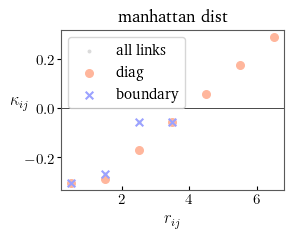

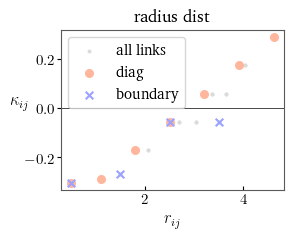

In [7]:
#find J vals on diagonal
couples_diag = [(1,1), (2,1), (3,2), (4,3), (5,4), (6,5), (7,6)]
radii_diag =  np.array([r_J1, r_J2, r_J4,  r_J9,  r_J13, r_J15, r_J16])
radii_diag_manhat = np.array([rm_J1, rm_J2, rm_J4,  rm_J9,  rm_J13, rm_J15, rm_J16])
J_diag =  [[jv(0,(Avals[i-1] + Avals[j-1])) for i,j in couples_diag]]

# find J vals on the boundary
couples_boundary = ((1,1), (2,2), (3,3), (4,4))
radii_boundary = np.array([r_J1, r_J3, r_J6, r_J10])
radii_boundary_manhat = np.array([rm_J1, rm_J3, rm_J6, rm_J10])
J_boundary =  [[jv(0,(Avals[i-1] + Avals[j-1])) for i,j in couples_boundary]]

# find all other J vals
a_matrix = [[1, 1, 2, 3, 4],
            [1, 1, 2, 3, 4],
            [2, 2, 3, 4, 5],
            [3, 3, 4, 5, 6],
            [4, 4, 5, 6, 7]
            ]
J_list = []
for i_y, i_x in product(range(1, 5), range(1, 5)):

    J_left =  jv(0,(Avals[a_matrix[i_y][i_x]-1] + Avals[a_matrix[i_y][i_x-1]-1])) # y same
    J_down =  jv(0,(Avals[a_matrix[i_y][i_x]-1] + Avals[a_matrix[i_y-1][i_x]-1])) #x same
    # print(a_matrix[i_y][i_x], a_matrix[i_y][i_x-1], J_left)

    r_down = np.sqrt( (i_x-0.5)**2 + (i_y-1)**2)
    r_left = np.sqrt( (i_x-1)**2 + (i_y-0.5)**2)

    # manhattan distance
    rm= i_x+ i_y-1.5

    J_list.append((J_left, r_left, rm))
    J_list.append((J_down, r_down, rm))
J_all, r_all, r_all_manhat = list(zip(*J_list))

fig, ax = plt.subplots(figsize=(7.3/2.54,5.3/2.54))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
ax.scatter(r_all_manhat, J_all, marker= '.',  c="0.86", s = 13, label="all links")
ax.scatter(radii_diag_manhat,J_diag, marker = 'o', c=colour1, s = 30, label="diag")
ax.scatter(radii_boundary_manhat,J_boundary, marker = 'x', c=colour2, s = 30, label="boundary")

ax.tick_params(axis='both', which='major', pad=1)
ax.set_xlabel(r"$r_{ij}$")
ax.set_ylabel(r"$\kappa_{ij}$", rotation=0)
ax.legend()
ax.set_title("manhattan dist")

# xticks = np.arange(0,12,2)
# ax.set_xticks(xticks)
# ax.set_xticklabels([str(i+1) for i in xticks])\
# fig.savefig(save_dir/"linear_tunnelling_2D.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()

fig, ax = plt.subplots(figsize=(7.3/2.54,5.3/2.54))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
ax.scatter(r_all, J_all, marker= '.',  c="0.86", s = 13, label="all links")

ax.scatter(radii_diag,J_diag, marker = 'o', c=colour1, s = 30, label="diag")
ax.scatter(radii_boundary,J_boundary, marker = 'x', c=colour2, s = 30, label="boundary")
ax.tick_params(axis='both', which='major', pad=1)
ax.set_xlabel(r"$r_{ij}$")
ax.set_ylabel(r"$\kappa_{ij}$", rotation=0)
ax.legend()
ax.set_title("radius dist")
# xticks = np.arange(0,12,2)
# ax.set_xticks(xticks)
# ax.set_xticklabels([str(i+1) for i in xticks])\
# fig.savefig(save_dir/"linear_tunnelling_2D.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()


In [11]:
couples_order = [(1,1), (1,2), (2,2), (2,3), (3,3), (3,4), (4,4), (4,5), (5,6), (6,7)]
J_order =  [jv(0,(Avals[i-1] + Avals[j-1])) for i,j in couples_order]
for i in range(len(couples_order)):
    print(f"J{i+1}:{J_order[i]:.5f}")


J1:-0.30657
J2:-0.28776
J3:-0.26736
J4:-0.17276
J5:-0.05776
J6:-0.05776
J7:-0.05776
J8:0.05724
J9:0.17224
J10:0.28724


# 7x7
###### Strategy: 
######      1) set diag A vals to be linear
######      2) set boundary vals to be linear
######      3) fill in A8


In [2]:
#indices; real radius; manhattan radius
l_J1 = (0,0.5);r_J1 = np.sqrt(l_J1[0]**2 + l_J1[1]**2); rm_J1 = l_J1[0]+ l_J1[1]
l_J2 = (1,0.5);r_J2 = np.sqrt(l_J2[0]**2 + l_J2[1]**2); rm_J2 = l_J2[0]+ l_J2[1]
l_J3 = (0,1.5);r_J3 = np.sqrt(l_J3[0]**2 + l_J3[1]**2); rm_J3 = l_J3[0]+ l_J3[1]
l_J4 = (1,1.5);r_J4 = np.sqrt(l_J4[0]**2 + l_J4[1]**2); rm_J4 = l_J4[0]+ l_J4[1]
l_J5 = (2,0.5);r_J5 = np.sqrt(l_J5[0]**2 + l_J5[1]**2); rm_J5 = l_J5[0]+ l_J5[1]
l_J6 = (2,1.5);r_J6 = np.sqrt(l_J6[0]**2 + l_J6[1]**2); rm_J6 = l_J6[0]+ l_J6[1]
l_J7 = (0,2.5);r_J7 = np.sqrt(l_J7[0]**2 + l_J7[1]**2); rm_J7 = l_J7[0]+ l_J7[1]
l_J8 = (1,2.5);r_J8 = np.sqrt(l_J8[0]**2 + l_J8[1]**2); rm_J8 = l_J8[0]+ l_J8[1]
l_J9 = (2,2.5);r_J9 = np.sqrt(l_J9[0]**2 + l_J9[1]**2); rm_J9 = l_J9[0]+ l_J9[1]
l_J10 = (3,0.5);r_J10 = np.sqrt(l_J10[0]**2 + l_J10[1]**2); rm_J10 = l_J10[0]+ l_J10[1]
l_J11 = (3,1.5);r_J11 = np.sqrt(l_J11[0]**2 + l_J11[1]**2); rm_J11 = l_J11[0]+ l_J11[1]
l_J12 = (3,2.5);r_J12 = np.sqrt(l_J12[0]**2 + l_J12[1]**2); rm_J12 = l_J12[0]+ l_J12[1]


radii = np.array([r_J1, r_J2, r_J3, r_J4, r_J5, r_J6, r_J7, r_J8, r_J9, r_J10, r_J11, r_J12])
radii_manhat = np.array([rm_J1, rm_J2, rm_J3, rm_J4, rm_J5, rm_J6, rm_J7, rm_J8, rm_J9, rm_J10, rm_J11, rm_J12])

# choose scale to get gradients positive and negative where you want them to be
scale = 0.34981
gradients = radii*scale - radii[0]*scale+ jv(0, 3.8316)
for i,j in enumerate(gradients):
    print(f"J{i+1}:{j}") 

J1:-0.40275939344110157
J2:-0.18656492383650083
J3:-0.0529493934411015
J4:0.0529645523939275
J5:0.14348739600755545
J6:0.29686060655889845
J7:0.29686060655889845
J8:0.3642278571507589
J9:0.5422740513070908
J10:0.4862411869207085
J11:0.5956340153727008
J12:0.7883873261233516


In [ ]:
xvals = ComputeAValsFromRequiredGradients(gradients)
print(xvals)






In [3]:
xvals = ComputeAValsFromRequiredGradients(gradients)
print(xvals)
# get diagonal A values from diagonal x values
# diagonal x values are xvals[0], xvals[1], xvals[3], xvals[5], xvals[8], xvals[11]

# choose A1 first from centre
A1 = xvals[0]/2+0.2 # add the 0.2 as this seems to keep all A vals positive..
A2 = xvals[0] - A1
A3 = xvals[1] - A2
A5 = xvals[3] - A3
A6 = xvals[5] - A5
A9 = xvals[8] - A6
A10= xvals[11] - A9

# get boundary A vals from boundary x vals
A4 = xvals[2] - A2
A7 = xvals[6] - A4

# get last A val A8 somehow
A8 = xvals[9] - A7

# now these A values should ensure that the gradient along the diagonal is linear
Avals = np.array([A1, A2, A3, A4, A5, A6, A7, A8, A9, A10])
print(Avals)

# now these A values should ensure that the gradient along the diagonal is linear

[3.83159489 2.80373732 2.50920738 2.3047754  2.14084171 1.8741304
 1.8741304  1.75827855 1.44503007 1.54560872 1.34640085 0.9462159 ]
[2.11579744 1.71579744 1.08793988 0.79340994 1.21683552 0.65729488
 1.08072047 0.46488826 0.78773519 0.1584807 ]


In [4]:
def cost(x):
    """ x are list of A we are trying to find"""
    cost = ((jv(0, x[0] + x[1]) - gradients[0])**2 + 
            (jv(0, x[1] + x[2]) - gradients[1])**2 + 
            (jv(0, x[1] + x[3]) - gradients[2])**2 + 
            (jv(0, x[2] + x[4]) - gradients[3])**2 + 
            (jv(0, x[3] + x[4]) - gradients[4])**2 + 
            (jv(0, x[4] + x[5]) - gradients[5])**2 + 
            (jv(0, x[3] + x[6]) - gradients[6])**2 + 
            (jv(0, x[4] + x[7]) - gradients[7])**2 + 
            (jv(0, x[5] + x[8]) - gradients[8])**2 + 
            (jv(0, x[6] + x[7]) - gradients[9])**2 + 
            (jv(0, x[7] + x[8]) - gradients[10])**2 + 
            (jv(0, x[8] + x[9]) - gradients[11])**2)
    return cost

# initial conditions from figuring out systematically
x0 = (A1, A2, A3, A4, A5, A6, A7, A8, A9, A10)
bnds = ((0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None))

from scipy.optimize import minimize
res = minimize(cost, x0, bounds = bnds)
Avals_gd = res.x

In [5]:
print(Avals)
print(Avals_gd)

[2.11579744 1.71579744 1.08793988 0.79340994 1.21683552 0.65729488
 1.08072047 0.46488826 0.78773519 0.1584807 ]
[2.11582203 1.68720929 1.07389822 0.85328855 1.25699391 0.61473761
 1.02771616 0.51056825 0.832959   0.11328618]


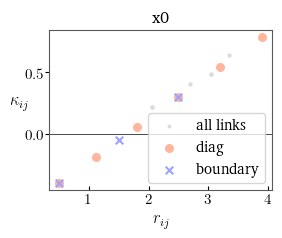

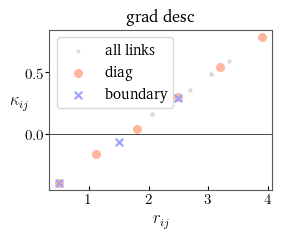

In [6]:
#find J vals on diagonal
couples_diag = [(1,2), (2,3), (3,5), (5,6), (6,9), (9,10)]
radii_diag =  np.array([r_J1, r_J2, r_J4,  r_J6,  r_J9, r_J12])
#from initial conditions
J_diag =  [[jv(0,(Avals[i-1] + Avals[j-1])) for i,j in couples_diag]]
#from gradient descent
J_diag_gd =  [[jv(0,(Avals_gd[i-1] + Avals_gd[j-1])) for i,j in couples_diag]]

# find J vals on the boundary
couples_boundary = ((1,2), (2,4), (4,7))
radii_boundary = np.array([r_J1, r_J3, r_J7])
#from initial conditions
J_boundary =  [[jv(0,(Avals[i-1] + Avals[j-1])) for i,j in couples_boundary]]
#from gradient descent
J_boundary_gd =  [[jv(0,(Avals_gd[i-1] + Avals_gd[j-1])) for i,j in couples_boundary]]

# find all other J vals
#begin by encoding A values on 5x5 grid, then taking all tunnellings down and left on a 4x4 grid
a_matrix = [[3, 2, 3, 5, 8],
            [2, 1, 2, 4, 7],
            [3, 2, 3, 5, 8],
            [5, 4, 5, 6, 9],
            [8, 7, 8, 9, 10]]

J_list = []
J_list_gd = []
for i_y, i_x in product(range(1, 5), range(1, 5)):
    J_down =  jv(0,(Avals[a_matrix[i_y][i_x]-1] + Avals[a_matrix[i_y][i_x-1]-1])) # i_y the same
    J_left =  jv(0,(Avals[a_matrix[i_y][i_x]-1] + Avals[a_matrix[i_y-1][i_x]-1])) # i_x the same
    J_down_gd =  jv(0,(Avals_gd[a_matrix[i_y][i_x]-1] + Avals_gd[a_matrix[i_y][i_x-1]-1])) 
    J_left_gd =  jv(0,(Avals_gd[a_matrix[i_y][i_x]-1] + Avals_gd[a_matrix[i_y-1][i_x]-1])) 
    # print(a_matrix[i_y][i_x], a_matrix[i_y][i_x-1], J_left)
    r_down = np.sqrt( (i_x-1.5)**2 + (i_y-1)**2) # i_y the same
    r_left = np.sqrt( (i_x-1)**2 + (i_y-1.5)**2) #i_x the same

    J_list.append((J_left, r_left))
    J_list.append((J_down, r_down))
    J_list_gd.append((J_left_gd, r_left))
    J_list_gd.append((J_down_gd, r_down))
J_all, r_all = list(zip(*J_list))
J_all_gd, _= list(zip(*J_list_gd))



fig, ax = plt.subplots(figsize=(7.3/2.54,5.3/2.54))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
ax.scatter(r_all, J_all, marker= '.',  c="0.86", s = 13, label="all links")
ax.scatter(radii_diag,J_diag, marker = 'o', c=colour1, s = 30, label="diag")
ax.scatter(radii_boundary,J_boundary, marker = 'x', c=colour2, s = 30, label="boundary")
ax.tick_params(axis='both', which='major', pad=1)
ax.set_xlabel(r"$r_{ij}$")
ax.set_ylabel(r"$\kappa_{ij}$", rotation=0)
ax.legend()
ax.set_title("x0")
# xticks = np.arange(0,12,2)
# ax.set_xticks(xticks)
# ax.set_xticklabels([str(i+1) for i in xticks])\
# fig.savefig(save_dir/"linear_tunnelling_2D.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()

fig, ax = plt.subplots(figsize=(7.3/2.54,5.3/2.54))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
ax.scatter(r_all, J_all_gd, marker= '.',  c="0.86", s = 13, label="all links")
ax.scatter(radii_diag,J_diag_gd, marker = 'o', c=colour1, s = 30, label="diag")
ax.scatter(radii_boundary,J_boundary_gd, marker = 'x', c=colour2, s = 30, label="boundary")
ax.tick_params(axis='both', which='major', pad=1)
ax.set_xlabel(r"$r_{ij}$")
ax.set_ylabel(r"$\kappa_{ij}$", rotation=0)
ax.legend()
ax.set_title("grad desc")
# xticks = np.arange(0,12,2)
# ax.set_xticks(xticks)
# ax.set_xticklabels([str(i+1) for i in xticks])\
# fig.savefig(save_dir/"linear_tunnelling_2D.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()


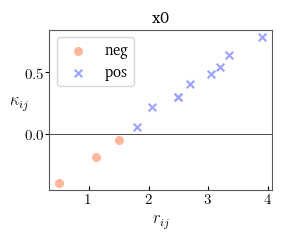

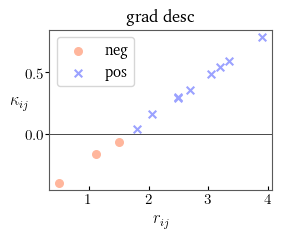

In [7]:
#check right tunnellings are positive vs negative
# find tunnellings that should be negative
couples_neg = [(1,2), (2,3), (2,4)]
radii_neg =  np.array([r_J1, r_J2, r_J3])
#from initial conditions
J_neg =  [[jv(0,(Avals[i-1] + Avals[j-1])) for i,j in couples_neg]]
#from gradient descent
J_neg_gd =  [[jv(0,(Avals_gd[i-1] + Avals_gd[j-1])) for i,j in couples_neg]]

# tunnellings that should be positive
couples_pos = ((3,5), (4,5), (5,6), (4, 7), (5, 8), (6, 9), (7,8), (8,9), (9,10))
radii_pos = np.array([r_J4, r_J5, r_J6, r_J7, r_J8, r_J9, r_J10, r_J11, r_J12])
#from initial conditions
J_pos =  [[jv(0,(Avals[i-1] + Avals[j-1])) for i,j in couples_pos]]
#from gradient descent
J_pos_gd =  [[jv(0,(Avals_gd[i-1] + Avals_gd[j-1])) for i,j in couples_pos]]


fig, ax = plt.subplots(figsize=(7.3/2.54,5.3/2.54))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
ax.scatter(radii_neg,J_neg, marker = 'o', c=colour1, s = 30, label="neg")
ax.scatter(radii_pos,J_pos, marker = 'x', c=colour2, s = 30, label="pos")
ax.tick_params(axis='both', which='major', pad=1)
ax.set_xlabel(r"$r_{ij}$")
ax.set_ylabel(r"$\kappa_{ij}$", rotation=0)
ax.legend()
ax.set_title("x0")
# xticks = np.arange(0,12,2)
# ax.set_xticks(xticks)
# ax.set_xticklabels([str(i+1) for i in xticks])\
# fig.savefig(save_dir/"linear_tunnelling_2D.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()

fig, ax = plt.subplots(figsize=(7.3/2.54,5.3/2.54))
plt.axhline(y=0, color='0', linestyle='-', lw=0.5)
ax.scatter(radii_neg,J_neg_gd, marker = 'o', c=colour1, s = 30, label="neg")
ax.scatter(radii_pos,J_pos_gd, marker = 'x', c=colour2, s = 30, label="pos")
ax.tick_params(axis='both', which='major', pad=1)
ax.set_xlabel(r"$r_{ij}$")
ax.set_ylabel(r"$\kappa_{ij}$", rotation=0)
ax.legend()
ax.set_title("grad desc")
# xticks = np.arange(0,12,2)
# ax.set_xticks(xticks)
# ax.set_xticklabels([str(i+1) for i in xticks])\
# fig.savefig(save_dir/"linear_tunnelling_2D.pdf", format="pdf", bbox_inches="tight", pad_inches=0.01)
plt.show()


In [14]:
#okay ^ this looks good!
# print J vals

couples_order = [(1,2), (2,3), (2,4), (3,5), (4,5), (5,6), (4, 7), (5, 8), (6, 9), (7,8), (8,9), (9,10)]
J_order =  [jv(0,(Avals_gd[i-1] + Avals_gd[j-1])) for i,j in couples_order]
for i in range(len(couples_order)):
    print(f"J{i+1}:{J_order[i]:.5f}")



J1:-0.40259
J2:-0.16885
J3:-0.06831
J4:0.03895
J5:0.16077
J6:0.29826
J7:0.29286
J8:0.35884
J9:0.54081
J10:0.49037
J11:0.59716
J12:0.78837
